# <span style="color:blue">MBA em Ciência de Dados</span>
# <span style="color:blue">Análise de Dados com Base em Processamento Massivo em Paralelo</span>

## <span style="color:blue">Aula 05: Consultas OLAP</span>
## <span style="color:blue">Exemplo usando Pandas</span>

**Material Produzido por:**<br>
>**Profa. Dra. Cristina Dutra de Aguiar**<br>

**CEMEAI - ICMC/USP São Carlos**

Este notebook contém exercícios classificados como essenciais e complementares. A indicação da classificação de cada exercício é feita junto de sua definição. Os exercícios estão espalhados ao longo do texto. Por favor, procurem por EXERCÍCIO para encontrar a especificação dos exercícios e as suas respectivas respostas. Também é possível localizar os exercícios utilizando o menu de navegação. Por completude, o notebook possui todas as descrições apresentadas na parte prática da Aula 05. Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios. 

# 1 Introdução

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos que une dois esquemas estrela, conforme descrito a seguir.


## 1.1 Esquema Estrela Pagamento

O primeiro esquema estrela, chamado Pagamento, é composto pelas seguintes tabelas de dimensão e tabela de fatos:

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)

## 1.2 Esquema Estrela Negociacao

O segundo esquema estrela, chamado Negociacao, é composto pelas seguintes tabelas de dimensão e tabela de fatos:
- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.3 Constelação de Fatos

Na constelação de fatos, as tabelas de dimensão data e equipe são tabelas em comum entre os dois esquemas estrela. As tabelas de dimensão e as tabelas de fatos da constelação da BI Solutions são listadas a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.4 Junção Estrela

A operação de junção estrela é necessária devido à forma de organização dos dados do data warehouse segundo os tipos de esquema estrela, floco de neve e estrela-foco. 

No processamento de uma consulta OLAP especificada pelo usuário de sistemas de suporte à decisão, deve-se realizar as seguintes atividades:
- Acessar a tabela de fatos e todas as tabelas de dimensão envolvidas na consulta.
- Realizar as junções necessárias, usando como base a integridade referencial, ou seja, usando como base os pares de chave primária (PK) e chave estrangeira (FK). No caso da junção estrela, isso significa fazer a junção da chave primária de cada tabela de dimensão envolvida na consulta com a chave estrangeira daquela tabela presente na tabela de fatos.
- Exibir os resultados obtidos.

Em Pandas, a junção estrela é feita usando-se o comando `merge`. Dentro do contexto desta aula, comando `merge` realiza a junção entre dois `DataFrames`, considerando a(s) coluna(s) usada como base para a junção, chamada de coluna(s) de junção.  Maiores detalhes sobre o comando merge podem ser obtidos neste [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).


# 2 Carregamento das Tabelas de Dimensão e das Tabelas de Fatos



In [1]:
import pandas as pd

Os comandos a seguir instanciam os `DataFrames` que são usados nas consultas analíticas. Para facilitar o entendimento dos conceitos, cada `DataFrame` possui o mesmo nome da tabela de dimensão ou da tabela de fatos correspondente.  

### 2.1 Carregamento das Tabelas de Dimensão

In [2]:
# criando e exibindo o DataFrame para a tabela de dimensão data
data = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv')
data.head(3)

,dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,1,1/1/2016,1,1,1,1,1,2016
1,2,2/1/2016,2,1,1,1,1,2016
2,3,3/1/2016,3,1,1,1,1,2016


In [3]:
# criando e exibindo o DataFrame para a tabela de dimensão funcionario
funcionario = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv')
funcionario.head(3)

,funcPK,funcMatricula,funcNome,funcSexo,funcDataNascimento,funcDiaNascimento,funcMesNascimento,funcAnoNascimento,funcCidade,funcEstadoNome,funcEstadoSigla,funcRegiaoNome,funcRegiaoSigla,funcPaisNome,funcPaisSigla
0,1,M-1,ALINE ALMEIDA,F,1/1/1990,1,1,1990,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,M-2,ARAO ALVES,M,2/2/1990,2,2,1990,CAMPINAS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,M-3,ARON ANDRADE,M,3/3/1990,3,3,1990,SANTOS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [4]:
# criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv')
equipe.head(3)

,equipePK,equipeNome,filialNome,filialCidade,filialEstadoNome,filialEstadoSigla,filialRegiaoNome,filialRegiaoSigla,filialPaisNome,filialPaisSigla
0,1,APP - DESKTOP,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,RIO DE JANEIRO,RIO DE JANEIRO,RJ,SUDESTE,SE,BRASIL,BR
2,3,WEB,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


In [5]:
# criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv')
cargo.head(3)

,cargoPK,cargoNome,cargoRegimeTrabalho,cargoJornadaTrabalho,cargoEscolaridadeMinima,cargoNivel
0,1,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,MEDIO,JUNIOR
1,2,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,SUPERIOR,PLENO
2,3,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,POS,SENIOR


In [6]:
# criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv')
cliente.head(3)

,clientePK,clienteNomeFantasia,clienteSetor,clienteCidade,clienteEstadoNome,clienteEstadoSigla,clienteRegiaoNome,clienteRegiaoSigla,clientePaisNome,clientePaisSigla
0,1,VIA FOOD,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,VIA PIZZA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,VIA JAPA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


### 2.2 Carregamento das Tabelas de Fatos

In [7]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv')
pagamento.head(3)

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos
0,147,2,5,64,1559.94,1
1,124,2,5,329,8102.77,1
2,175,1,5,328,2532.51,1


In [8]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv')
negociacao.head(3)

,equipePK,clientePK,dataPK,receita,quantidadeNegociacoes
0,2,9,22,11564.75,1
1,2,24,11,17990.50,1
2,2,28,21,16335.90,1


# 3 Execução de Consultas com Foco nas Operações OLAP

## 3.1 Operação Slice and Dice

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?


In [11]:
data

,dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,1,1/1/2016,1,1,1,1,1,2016
1,2,2/1/2016,2,1,1,1,1,2016
2,3,3/1/2016,3,1,1,1,1,2016
3,4,4/1/2016,4,1,1,1,1,2016
4,5,5/1/2016,5,1,1,1,1,2016
...,...,...,...,...,...,...,...,...
1822,1823,27/12/2020,27,12,6,4,2,2020
1823,1824,28/12/2020,28,12,6,4,2,2020
1824,1825,29/12/2020,29,12,6,4,2,2020
1825,1826,30/12/2020,30,12,6,4,2,2020


In [13]:
dataFiltrada = data.query('dataMes == 9 and dataAno == 2020')
dataFiltrada.shape

(30, 8)

In [14]:
pagamento

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos
0,147,2,5,64,1559.94,1
1,124,2,5,329,8102.77,1
2,175,1,5,328,2532.51,1
3,171,1,5,245,7882.70,1
4,148,2,5,65,4404.59,1
...,...,...,...,...,...,...
8635,101,9,1801,249,10694.08,1
8636,57,10,1801,2,8651.90,1
8637,100,10,1801,267,9985.22,1
8638,61,9,1801,528,9245.98,1


In [15]:
pagamentoFiltrado = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoFiltrado

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,147,2,1710,64,1559.94,1,5/9/2020,5,9,5,3,2,2020
1,124,2,1710,329,8102.77,1,5/9/2020,5,9,5,3,2,2020
2,175,1,1710,328,2532.51,1,5/9/2020,5,9,5,3,2,2020
3,171,1,1710,245,7882.70,1,5/9/2020,5,9,5,3,2,2020
4,148,2,1710,65,4404.59,1,5/9/2020,5,9,5,3,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,101,9,1710,249,10694.08,1,5/9/2020,5,9,5,3,2,2020
196,57,10,1710,2,8651.90,1,5/9/2020,5,9,5,3,2,2020
197,100,10,1710,267,9985.22,1,5/9/2020,5,9,5,3,2,2020
198,61,9,1710,528,9245.98,1,5/9/2020,5,9,5,3,2,2020


In [16]:
pagamentoFiltrado['quantidadeLancamentos'].sum()

200

## 3.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada semestre?

In [17]:
pagamentoData = pagamento.merge(data, on = 'dataPK')
pagamentoData

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,147,2,5,64,1559.94,1,5/1/2016,5,1,1,1,1,2016
1,124,2,5,329,8102.77,1,5/1/2016,5,1,1,1,1,2016
2,175,1,5,328,2532.51,1,5/1/2016,5,1,1,1,1,2016
3,171,1,5,245,7882.70,1,5/1/2016,5,1,1,1,1,2016
4,148,2,5,65,4404.59,1,5/1/2016,5,1,1,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,101,9,1801,249,10694.08,1,5/12/2020,5,12,6,4,2,2020
8636,57,10,1801,2,8651.90,1,5/12/2020,5,12,6,4,2,2020
8637,100,10,1801,267,9985.22,1,5/12/2020,5,12,6,4,2,2020
8638,61,9,1801,528,9245.98,1,5/12/2020,5,12,6,4,2,2020


In [18]:
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum()

dataAno  dataSemestre
2016     1               2221308.54
         2               2221308.54
2017     1               4887639.90
         2               4887639.90
2018     1               7467763.20
         2               7467763.20
2019     1               9283833.18
         2               9283833.18
2020     1               9283833.18
         2               9283833.18
Name: salario, dtype: float64

In [20]:
# modificando a visualização utilizando o .unstack()
pagamentoData.groupby(['dataSemestre', 'dataAno'])['salario'].sum().unstack(level = 1)

dataAno,2016,2017,2018,2019,2020
dataSemestre,,,,,
1,2221308.54,4887639.9,7467763.2,9283833.18,9283833.18
2,2221308.54,4887639.9,7467763.2,9283833.18,9283833.18


In [25]:
pagamentoData.groupby(['dataAno', 'dataSemestre'])['salario'].sum().unstack(level = 1)

dataSemestre,1,2
dataAno,,
2016,2221308.54,2221308.54
2017,4887639.90,4887639.90
2018,7467763.20,7467763.20
2019,9283833.18,9283833.18
2020,9283833.18,9283833.18


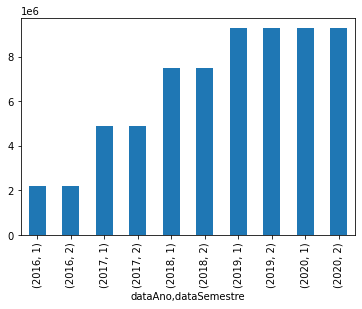

In [21]:
# imprimindo os dados de forma visual
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().plot(kind = 'bar')

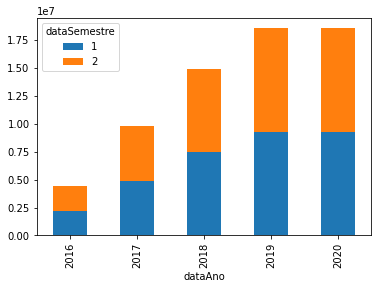

In [24]:
pagamentoData.groupby(['dataAno', 'dataSemestre'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada trimestre?

In [ ]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum()

In [ ]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por ano?

In [ ]:
pagamentoData.groupby(['dataAno'])['salario'].sum()

In [ ]:
pagamentoData.groupby(['dataAno'])['salario'].sum().plot(kind = 'bar')

## 3.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [ ]:
pagamentoData = pagamento.merge(data, on = 'dataPK')
pagamentoDataCargo = pagamentoData.merge(cargo, on = 'cargoPK')
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum()

In [ ]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1)

In [ ]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum()

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1)

In [ ]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

## 3.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [ ]:
#total gasto em salários considerando cada ano
#dados obtidos utilizando a tabela de fatos pagamento
pagamentoData = pagamento.merge(data, on = 'dataPK') 
pagamentoAno = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

In [ ]:
#total de receitas recebidas, considerando cada ano
#dados obtidos utilizando a tabela de fatos negociacao
negociacaoData = negociacao.merge(data, on = 'dataPK')
negociacaoAno = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

In [ ]:
#relacionado as medidas numéricas presentes nas duas tabelas de fatos
pagamentoAno.merge(negociacaoAno, on = 'dataAno')

In [ ]:
pagamentoAno.merge(negociacaoAno, on = 'dataAno').plot()

# 3 Execução de Consultas com Foco na Tomada de Decisão

As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 3.1 Consulta 1

**Consulta:** Qual é a média dos salários recebidos por nível do cargo e por sexo no ano passado, sendo que o ano passado se refere ao ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [ ]:
dataFiltrada = data.query('dataAno == 2019')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataFunc = pagamentoData.merge(funcionario, on = 'funcPK')
pagamentoDataFuncCargo = pagamentoDataFunc.merge(cargo, on = 'cargoPK')
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean()

In [ ]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1)

In [ ]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1).plot(kind = 'bar')

## 3.2 Consulta 2

**Consulta:** Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [ ]:
dataFiltrada = data.query('dataTrimestre == 3 and dataAno == 2020')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataEquipe = pagamentoData.merge(equipe, on = 'equipePK')
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values()

In [ ]:
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values().plot(kind = 'bar')

## 3.3 Consulta 3

**Consulta:** Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


In [ ]:
#investigando os gastos em salarios de cada equipe no último semestre ano 
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
pagamentoData = dataFiltrada.merge(pagamento, on = 'dataPK' )
pagamentoDataEquipe = pagamentoData.groupby(['equipePK'])['salario'].sum().to_frame() 
pagamentoDataEquipe.head(10)

In [ ]:
#investigando os ganhos em receitas de cada equipe no semestre 1 de 2020
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
negociacaoData = dataFiltrada.merge(negociacao, on = 'dataPK' )
negociacaoDataEquipe = negociacaoData.groupby(['equipePK'])['receita'].sum().to_frame() 
negociacaoDataEquipe.head(10)

In [ ]:
#juntando os dados obtidos
pagamentoNegociacao = pagamentoDataEquipe.merge(negociacaoDataEquipe, on = 'equipePK' )
pagamentoNegociacao.head(10)

In [ ]:
pagamentoNegociacaoEquipeCidade = pagamentoNegociacao.merge(equipe, on = 'equipePK' )
pagamentoNegociacaoEquipeCidade.head(5)[['equipeNome', 'filialNome', 'salario', 'receita']]

In [ ]:
pagamentoNegociacaoEquipeCidade['lucro'] = pagamentoNegociacaoEquipeCidade['receita'] - pagamentoNegociacaoEquipeCidade['salario']
pagamentoNegociacaoEquipeCidade[['equipeNome', 'filialNome', 'lucro']].sort_values(by='lucro', ascending=False).head(10)

In [ ]:
pagamentoNegociacaoEquipeCidade['lucro'].sort_values(ascending=False).head(5).plot(kind = 'bar')

# 4 Exercícios

## Exercício 1

Liste, para cada ano, a quantidade de negociações realizadas pelos clientes residentes no estado de Pernambuco. 

In [37]:
# Resposta do exercício
# groupby - dataAno
# informacao - quantidadeNegociacao
# filtrar - clientes de Pernambuco <- sempre primeiro

# 
clienteFiltrado = cliente.query('clienteEstadoNome == "PERNAMBUCO"')
negociacaoCliente = negociacao.merge(clienteFiltrado, on = 'clientePK')
negociacaoClienteData = negociacaoCliente.merge(data, on = 'dataPK')
resultado = negociacaoClienteData.groupby(['dataAno'])['receita'].mean()
resultado

dataAno
2016    20195.448077
2017    11710.046875
2018    18340.275000
2019    21249.651389
2020    19951.238095
Name: receita, dtype: float64

In [38]:
type(resultado)

pandas.core.series.Series

In [39]:
resultado.to_frame()

,receita
dataAno,
2016,20195.448077
2017,11710.046875
2018,18340.275000
2019,21249.651389
2020,19951.238095


## Exercício 2 

Mostre o resultado do Exercício 1 usando um gráfico de barra. 

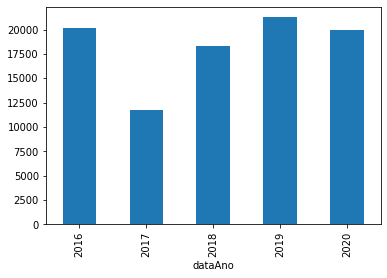

In [40]:
# Resposta do exercício
resultado.plot(kind = 'bar')

## Exercício 3 

Qual o total de despesas em salários nos anos de 2016 a 2020 em cada região na qual a equipe está localizada, considerando o cargo de nível junior? Arredonde a soma dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "REGIAO", "TOTALDESPESA". Ordene as linhas exibidas primeiro pelo total de despesa em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

In [ ]:
# Resposta do exercício

## Exercício 4 

Mostre o resultado do Exercício 3 usando um diagrama de barras que permite a visualização dos resultados por região.

In [ ]:
# Resposta do exercício

## Exercício 5 

Liste o total dos salários e o total de receitas recebidas, considerando os anos de 2017, 2018 e 2019. Arredonde o total dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS". Ordene as linhas exibidas pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.


In [64]:
# Resposta do exercício

# informacao - total salario, total receitas
# filtra - dataAno [2017, 2018, 2019]

# (1) informacao - total salario, filtrado pelo dataAno
dataFiltrada = data.query('dataAno == 2017 or dataAno == 2018 or dataAno == 2019')
dataFiltrada = data.query('dataAno in [2017, 2018, 2019]')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
resultado1 = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

# (2) informacao - total receitas, filtrado pelo dataAno
dataFiltrada = data.query('dataAno in [2017, 2018, 2019]')
negociacaoData = negociacao.merge(dataFiltrada, on = 'dataPK')
resultado2 = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

# drill-across
resultado1.merge(resultado2, on = 'dataAno')
resultadoFinal = pd.concat([resultado1, resultado2], axis=1) # neste caso foi igual, mas cuidado! heheh
resultadoFinal

,salario,receita
dataAno,,
2017,9775279.80,7200423.35
2018,14935526.40,11593539.65
2019,18567666.36,35353318.30


In [72]:
resultadoFinal1 = resultadoFinal.reset_index(drop=False)

# arrendondar - round(2)
resultadoFinal2 = resultadoFinal1.round(2)

# renomear e imprimir - "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS"
resultadoFinal3 = resultadoFinal2.rename(columns={
    'dataAno': "ANO",
    'salario': "TOTAL GASTO EM SALARIOS",
    'receita': "TOTAL DE RECEITAS RECEBIDAS"
})

# order - dataAno DESC
resultadoFinal3.sort_values(by=['ANO'], ascending = False)

,ANO,TOTAL GASTO EM SALARIOS,TOTAL DE RECEITAS RECEBIDAS
2,2019,18567666.36,35353318.30
1,2018,14935526.40,11593539.65
0,2017,9775279.80,7200423.35


## Exercício 6 

Mostre o resultado do Exercício 5 usando um diagrama de barras.

In [ ]:
# Resposta do exercício

## Exercício 7 

Compare a quantidade de negociações que cada uma das equipes realizou nos anos de 2018 e 2019. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "NEGOCIACOES 2018", "NEGOCIACOES 2019". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

Dica: Considere relacionar as equipes por meio da operação *drill-across*.

In [ ]:
# Resposta do exercício

## Exercício 8 

Liste os setores dos clientes e a soma de suas respectivas receitas para o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "SETOR DO CLIENTE", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

## Exercício 9 

Analise a resposta do Exercício 8 para identificar qual o setor do cliente que obteve o maior total de receitas. Mostre o total de receitas por mês para esse setor do cliente, considerando o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "MES", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente e depois pelo mês em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

## Exercício 10 

Analise a resposta do Exercício 9 para identificar qual mês gerou o maior total de receitas para o setor de cliente identificado no Exercício 8. Mostre o total de receitas das equipes, considerando o segundo semestre do ano de 2020, o setor de cliente identificado no Exercício 8 e o mês identificado no Exercício 9. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo pelo nome da equipe em ordem ascendente, e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*

In [ ]:
# Resposta do exercício